# Vaccine Data Analysis


In [1]:
#Importing libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing data and combining features with labels
features=pd.read_csv("training_set_features.csv")
labels=pd.read_csv("training_set_labels.csv")
df=pd.concat((features,labels),ignore_index=True)
dfsave=df.copy()
df.drop(['respondent_id'], axis = 1,inplace=True)

## Exploratory Data Analysis

In [3]:
df.head().transpose()

,0,1,2,3,4
xyz_concern,1.0,3.0,1.0,1.0,2.0
xyz_knowledge,0.0,2.0,1.0,1.0,1.0
behavioral_antiviral_meds,0.0,0.0,0.0,0.0,0.0
behavioral_avoidance,0.0,1.0,1.0,1.0,1.0
behavioral_face_mask,0.0,0.0,0.0,0.0,0.0
behavioral_wash_hands,0.0,1.0,0.0,1.0,1.0
behavioral_large_gatherings,0.0,0.0,0.0,1.0,1.0
behavioral_outside_home,1.0,1.0,0.0,0.0,0.0
behavioral_touch_face,1.0,1.0,0.0,0.0,1.0
doctor_recc_xyz,0.0,0.0,NaN,0.0,0.0


In [4]:
df.describe()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,xyz_vaccine,seasonal_vaccine
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


## Checking Datatypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53414 entries, 0 to 53413
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   xyz_concern                  26615 non-null  float64
 1   xyz_knowledge                26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_xyz              24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [6]:
#Finding dimesnsions of data
df.shape

(53414, 37)

#### Observation : There are a total of 38 features out of which 2 are our Target Features

## Checking for missing values in Dataset

In [7]:
#No of missing rows in each column of Dataset
df.isnull().sum()

xyz_concern                    26799
xyz_knowledge                  26823
behavioral_antiviral_meds      26778
behavioral_avoidance           26915
behavioral_face_mask           26726
behavioral_wash_hands          26749
behavioral_large_gatherings    26794
behavioral_outside_home        26789
behavioral_touch_face          26835
doctor_recc_xyz                28867
doctor_recc_seasonal           28867
chronic_med_condition          27678
child_under_6_months           27527
health_worker                  27511
health_insurance               38981
opinion_xyz_vacc_effective     27098
opinion_xyz_risk               27095
opinion_xyz_sick_from_vacc     27102
opinion_seas_vacc_effective    27169
opinion_seas_risk              27221
opinion_seas_sick_from_vacc    27244
age_group                      26707
education                      28114
race                           26707
sex                            26707
income_poverty                 31130
marital_status                 28115
r

In [8]:
#calculating missing data percentage in each Column
(df.isnull().sum() / len(df) ) * 100

xyz_concern                    50.172239
xyz_knowledge                  50.217172
behavioral_antiviral_meds      50.132924
behavioral_avoidance           50.389411
behavioral_face_mask           50.035571
behavioral_wash_hands          50.078631
behavioral_large_gatherings    50.162879
behavioral_outside_home        50.153518
behavioral_touch_face          50.239638
doctor_recc_xyz                54.043884
doctor_recc_seasonal           54.043884
chronic_med_condition          51.817875
child_under_6_months           51.535178
health_worker                  51.505223
health_insurance               72.978994
opinion_xyz_vacc_effective     50.732018
opinion_xyz_risk               50.726401
opinion_xyz_sick_from_vacc     50.739506
opinion_seas_vacc_effective    50.864942
opinion_seas_risk              50.962295
opinion_seas_sick_from_vacc    51.005354
age_group                      50.000000
education                      52.634141
race                           50.000000
sex             

#### Observations:
#### Except respondent_id (Primary Key) , all the columns have missing values.
#### Percentage of missing values is quiet high(around 50 %) in most of columns. We have to impute appropriate values.

## Checking for Duplicates

In [9]:
df.duplicated().sum()

26703

In [10]:
#Age column requires additional tuning
def preprocess_age(age_str):
    try:
        if age_str is np.nan:
            return
        # print(age_str)
        agr_str=age_str.strip().lower()
        age_str=age_str.lower()
        age_str = age_str.replace('+', '')
        age_str = age_str.replace(' years', '')
        try:
            start, end = age_str.split('-')
            start_age = int(start)
            end_age = int(end)
            avg_age = (start_age + end_age) / 2
        except:
            avg_age=int(age_str)
        return avg_age
    except Exception as e:
        return age_str
#preprocess the age 
df['age_group'] = df['age_group'].apply(preprocess_age)
# Apply preprocessing to age column
# df['age_age_group'] = df['age_group'].apply(preprocess_age)
# un=df.age_group.unique()
# un=['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
#        '45 - 54 Years', np.nan]
# for i in un:
#     print(preprocess_age(i)) 

#### Observation: No duplicate is present in the Data

## Imputation (Filling of missing Data)

In [11]:
#For Numerical Data
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
for i in numerical_columns:
    #filling the missing numerical data with median
    df[i].fillna(df[i].median(),inplace=True)

In [12]:
#For Categorical Data
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
for i in categorical_columns:
    #filling the missing Categorical data with median
    df[i].fillna(df[i].mode()[0], inplace=True)

In [13]:
#Just for Confirmation, Rechecking the Missing Values in the dataset
df.isnull().sum()

xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

#### All the null values have been imputed Successfully

In [14]:
#Feature Engineering

#Checking for no of unique values in each categorical columns
for col in categorical_columns:
    print(col,"-> ",df[col].nunique(),"Unique Values")
    print()
    print(df[col].value_counts().sort_values())
    print()

education ->  4 Unique Values

< 12 Years           2363
12 Years             5797
Some College         7043
College Graduate    38211
Name: education, dtype: int64

race ->  4 Unique Values

Other or Multiple     1612
Hispanic              1755
Black                 2118
White                47929
Name: race, dtype: int64

sex ->  2 Unique Values

Male      10849
Female    42565
Name: sex, dtype: int64

income_poverty ->  3 Unique Values

Below Poverty                 2697
> $75,000                     6810
<= $75,000, Above Poverty    43907
Name: income_poverty, dtype: int64

marital_status ->  2 Unique Values

Not Married    11744
Married        41670
Name: marital_status, dtype: int64

rent_or_own ->  2 Unique Values

Rent     5929
Own     47485
Name: rent_or_own, dtype: int64

employment_status ->  3 Unique Values

Unemployed             1453
Not in Labor Force    10231
Employed              41730
Name: employment_status, dtype: int64

hhs_geo_region ->  10 Unique Values

dqpwygqj

In [15]:
#Describe numerical columns
df[numerical_columns].describe()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,household_adults,household_children,xyz_vaccine,seasonal_vaccine
count,53414.000000,53414.000000,53414.000000,53414.000000,53414.000000,53414.000000,53414.000000,53414.000000,53414.000000,53414.000000,...,53414.000000,53414.000000,53414.000000,53414.00000,53414.000000,53414.000000,53414.000000,53414.000000,53414.000000,53414.000000
mean,1.809900,1.130696,0.024357,0.863875,0.034467,0.912944,0.178736,0.168139,0.839405,0.101247,...,2.168795,2.176190,4.012768,2.35266,2.057869,49.512431,0.943779,0.264799,0.106227,0.232804
std,0.670288,0.455469,0.154156,0.342925,0.182426,0.281919,0.383135,0.373994,0.367160,0.301658,...,0.918487,0.973031,0.761746,1.03439,0.934871,10.115231,0.533283,0.705811,0.308131,0.422622
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,26.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,2.000000,2.000000,4.000000,2.00000,2.000000,49.500000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,2.000000,2.000000,4.000000,2.00000,2.000000,49.500000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,2.000000,2.000000,4.000000,2.00000,2.000000,49.500000,1.000000,0.000000,0.000000,0.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,65.000000,3.000000,3.000000,1.000000,1.000000


In [16]:
#Describe Categorical columns
df[categorical_columns].describe()

,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
count,53414,53414,53414,53414,53414,53414,53414,53414,53414,53414,53414
unique,4,4,2,3,2,2,3,10,3,21,23
top,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",fcxhlnwr,xtkaffoo
freq,38211,47929,42565,43907,41670,47485,41730,31004,38352,42505,41955


## Checking for outliers

<Axes: xlabel='doctor_recc_seasonal'>

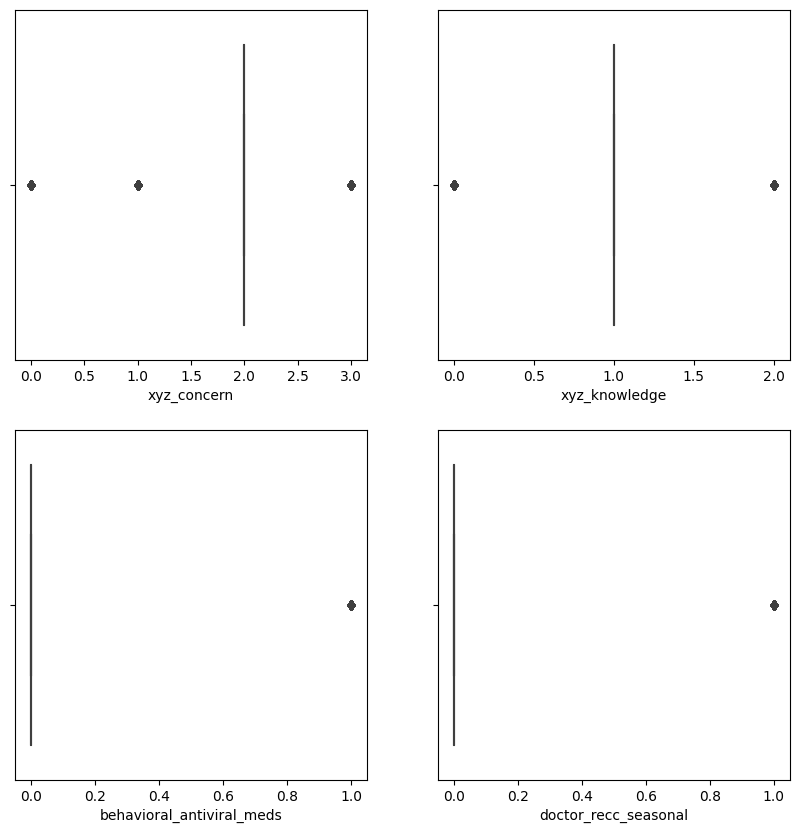

In [17]:
#using seaborn box plot for continuous variables
fig ,ax  =  plt.subplots(2,2, figsize  =(10,10) )
sns.boxplot(x='xyz_concern', data= df , ax= ax[0,0])
sns.boxplot(x='xyz_knowledge', data= df , ax= ax[0,1])
sns.boxplot(x='behavioral_antiviral_meds', data= df , ax= ax[1,0])
sns.boxplot(x='doctor_recc_seasonal', data= df , ax= ax[1,1])

## Univariate Analysis

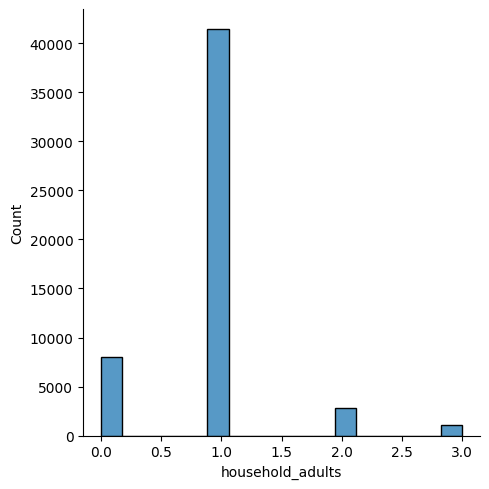

In [18]:
sns.displot(df.household_adults)

#### Observation : This category mostly have 1 and none have 0.5

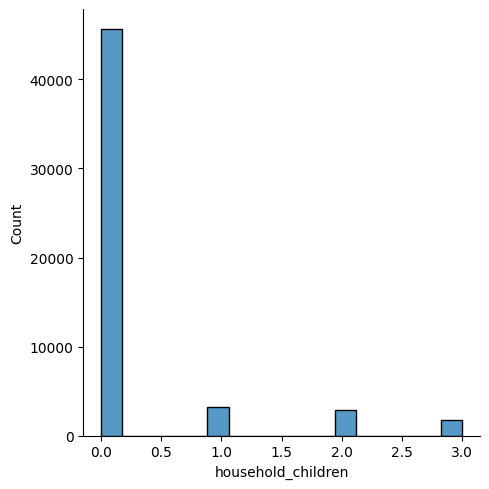

In [19]:
sns.displot(df.household_children)

#### Observation : This category mostly have 0 and none have 0.5,1.5 and 2.5

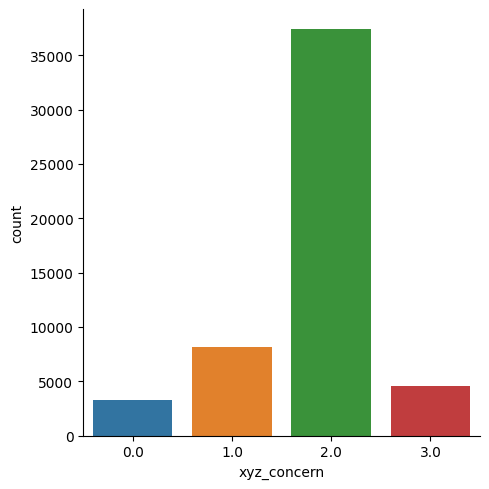

In [20]:
sns.catplot(x='xyz_concern',data=df,kind="count")

#### Observation : most of the people are somewhat concerned (2.0) about xyz

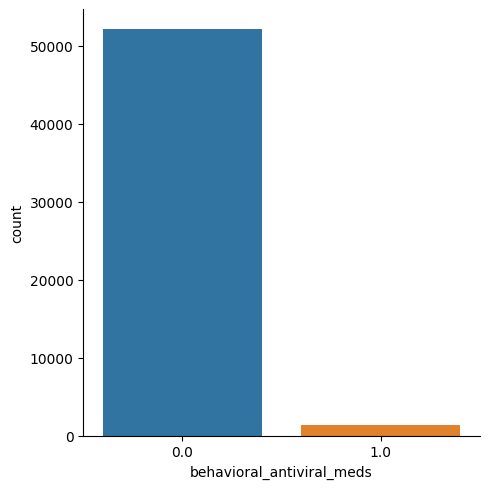

In [21]:
sns.catplot(x='behavioral_antiviral_meds',data=df,kind="count")

#### Observation : Most of the people have not taken any behavioral antiviral medicine

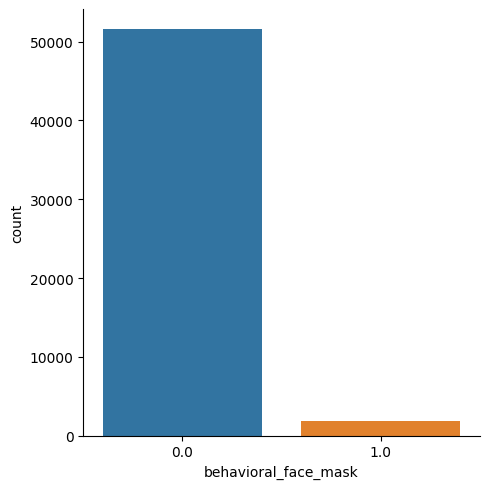

In [22]:
sns.catplot(x='behavioral_face_mask',data=df,kind="count")

In [23]:
#Percentage of people not wearing masks
(df['behavioral_face_mask'].value_counts()[0]/df['behavioral_face_mask'].count())*100


96.55333807615982

#### Most of the people are not using masks

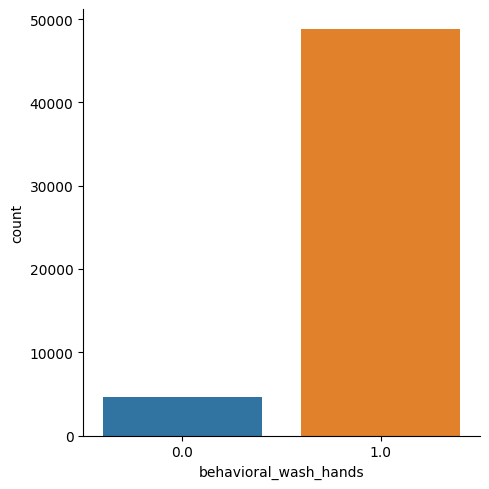

In [24]:
sns.catplot(x='behavioral_wash_hands',data=df,kind="count")

In [25]:
#Percentage of people washing hands behaviorally
(df['behavioral_wash_hands'].value_counts()[1]/df['behavioral_wash_hands'].count())*100


91.29441719399408

#### Most of people wash hands behaviorally.

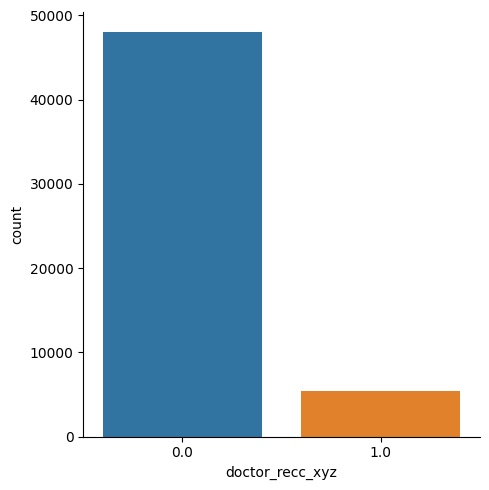

In [26]:

sns.catplot(x='doctor_recc_xyz',data=df,kind="count")

In [27]:
(df['doctor_recc_xyz'].value_counts()[1]/df['doctor_recc_xyz'].count())*100

10.124686411802148

#### Only few doctors recommend xyz flu vaccine

## Correlation Plot using seaborn heatmap

In [28]:
# plt.figure(figsize=(200,180))
# sns.heatmap(df[numerical_columns].corr(),cmap='YlGnBu',annot=True)
# plt.show()

In [29]:
#Now we need to drop some of the columns which are highly correlated as seen in heatmap

df.drop(columns=['behavioral_outside_home','doctor_recc_xyz'],inplace=True)
numerical_columns.remove('behavioral_outside_home')
numerical_columns.remove('doctor_recc_xyz')

## Data Preprocessing

In [30]:
#Encoding using LabelEncoder for Categorical Columns to convert all data into Numbers
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# encoder = LabelEncoder()
# df[categorical_columns]=df[categorical_columns].apply(encoder.fit_transform)

label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
    
# scaler = MinMaxScaler()
# dfs=scaler.fit_transform(df)
# df= pd.DataFrame(dfs, columns=df.columns, index=df.index)

df

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,8,2,0.0,0.0,4,21,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1,0,1,0,0.0,0.0,12,19,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,9,0,2.0,0.0,14,21,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1,1,5,1,0.0,0.0,4,21,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0,0,9,0,1.0,0.0,18,5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53409,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,6,0,1.0,0.0,4,21,0.0,0.0
53410,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,6,0,1.0,0.0,4,21,0.0,0.0
53411,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,6,0,1.0,0.0,4,21,0.0,1.0
53412,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,6,0,1.0,0.0,4,21,0.0,0.0


## Splitting dependendent and Independent Variables 

In [31]:
# Define features and target variables
X =df.drop(['xyz_vaccine','seasonal_vaccine'], axis=1)
# y_xyz = df['xyz_vaccine']
# y_seasonal = df['seasonal_vaccine']
y=df[['xyz_vaccine','seasonal_vaccine']]

## Train Test Split

In [32]:
from sklearn.model_selection import train_test_split
# Split the data
# X_train, X_test, y_train_xyz, y_test_xyz = train_test_split(X, y_xyz, test_size=0.2, random_state=42)
# X_train, X_test, y_train_seasonal, y_test_seasonal = train_test_split(X, y_seasonal, test_size=0.2, random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2,random_state=24)

## Feature Scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# X_train_scaled=X_train
# X_test_scaled=X_test

### Multi-label Classification problem

This problem can be carried out in three different ways as:

##### 1-Binary Relevance
##### 2-Classifier Chains
##### 3-Label Powerset

Because it is a multi-label classification problem.

## 1. Binary Relevance
Treats each label as a separate single class classification problem.



In [34]:
from skmultilearn.problem_transform import BinaryRelevance


#### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
classifier1 = BinaryRelevance(LogisticRegression())
classifier1.fit(X_train_scaled,y_train)
predictions_lr = classifier1.predict(X_test_scaled)
from sklearn.metrics import accuracy_score
lr_br=accuracy_score(y_test,predictions_lr)
lr_br

0.7493213516802396

#### Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
classifier2 = BinaryRelevance(GaussianNB())
classifier2.fit(X_train_scaled,y_train)
predictions_nb = classifier2.predict(X_test_scaled)
nb_br= accuracy_score(y_test,predictions_nb)
nb_br

0.5952447814284377

#### Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = BinaryRelevance(RandomForestClassifier(n_estimators=10,criterion='gini',max_depth=2))
classifier3.fit(X_train_scaled,y_train)
predictions_rf = classifier3.predict(X_test_scaled)
rf_br= accuracy_score(y_test,predictions_rf)
rf_br

0.7494149583450341

#### Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
classifier4 = BinaryRelevance(DecisionTreeClassifier())
classifier4.fit(X_train_scaled,y_train)
predictions_dt = classifier4.predict(X_test_scaled)
dt_br= accuracy_score(y_test,predictions_dt)
dt_br

0.7494149583450341

#### Gradient Boosting

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
classifier5 = BinaryRelevance(GradientBoostingClassifier())
classifier5.fit(X_train_scaled,y_train)
predictions_gb = classifier5.predict(X_test_scaled)
gb_br= accuracy_score(y_test,predictions_gb)
gb_br

0.7494149583450341

## Classifier Chains

First classifier is trained on the input data and then each next classifier is trained on the input space and all the previous classifiers in the chain. It forms chains in order to preserve label correlation.

In [40]:
from skmultilearn.problem_transform import ClassifierChain

#### Logistic Regression

In [41]:
chain1 = ClassifierChain(LogisticRegression())
chain1.fit(X_train_scaled,y_train)
predict_lr = chain1.predict(X_test_scaled)
lr_cc= accuracy_score(y_test,predict_lr)
lr_cc

C:\Users\shrey\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7494149583450341

#### Naive Bayes

In [42]:
chain2 = ClassifierChain(GaussianNB())
chain2.fit(X_train_scaled, y_train)
predict_nb = chain2.predict(X_test_scaled)
nb_cc= accuracy_score(y_test,predict_nb)
nb_cc

0.5952447814284377

## Label Powerset
Problem is transformed into a multi-class problem with one multi-class classifier is trained on all unique label combinations found in the training data.

In [43]:
from skmultilearn.problem_transform import LabelPowerset

#### Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB

model = LabelPowerset(GaussianNB())
model.fit(X_train_scaled, y_train)
predictions_nb_ps = model.predict(X_test_scaled)

nb_ps= accuracy_score(y_test,predictions_nb_ps)
nb_ps

0.6496302536740616

### Model Performance Comparison

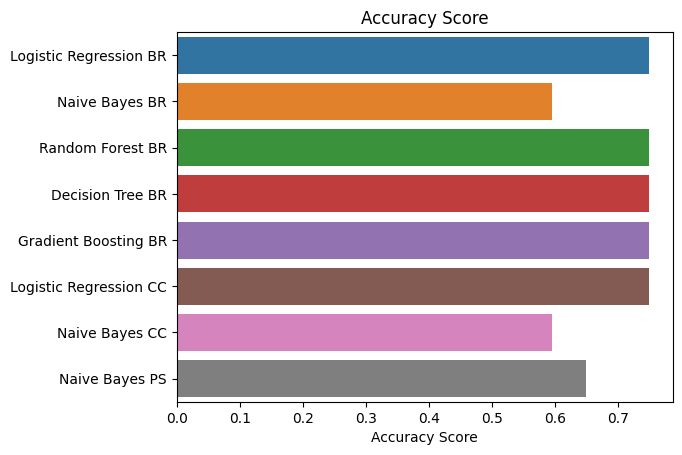

In [45]:
Accuracy_Score = [lr_br,nb_br,rf_br,dt_br,gb_br,lr_cc,nb_cc,nb_ps]
Models = ['Logistic Regression BR', 'Naive Bayes BR' , 'Random Forest BR', 'Decision Tree BR',
          'Gradient Boosting BR', 'Logistic Regression CC', 'Naive Bayes CC', 'Naive Bayes PS']

sns.barplot(x=Accuracy_Score, y=Models)
plt.xlabel('Accuracy Score')
plt.title('Accuracy Score')
plt.show()


## I will use Logistic Regression binary relevance 

In [46]:
#Predicting class probabilities
tdf=pd.read_csv('test_set_features.csv')

tdf['age_group'] = tdf['age_group'].apply(preprocess_age)
# tdf['education'] = tdf['education'].apply(lambda x: x if x in encoder.classes_ else 'Unknown')

#For Numerical Data
numerical_columns = tdf.select_dtypes(include=['number']).columns.tolist()
for i in numerical_columns:
    #filling the missing numerical data with median
    tdf[i].fillna(tdf[i].median(),inplace=True)

#For Categorical Data
categorical_columns = tdf.select_dtypes(include=['object', 'category']).columns.tolist()
for i in categorical_columns:
    #filling the missing Categorical data with median
    tdf[i].fillna(tdf[i].mode()[0], inplace=True)
tdf.drop(columns=['behavioral_outside_home','doctor_recc_xyz'],inplace=True)
numerical_columns.remove('behavioral_outside_home')
numerical_columns.remove('doctor_recc_xyz')


for column in categorical_columns:
    tdf[column] = label_encoders[column].transform(tdf[column])



td4=tdf.copy()
tdf=tdf.drop(columns=['respondent_id'],axis=1)

# tdfn=tdf
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
tdfn = sc.transform(tdf)

# tdf=pd.DataFrame(tdfn, columns=tdf.columns)

In [47]:
# X_test_scaled

In [48]:
tdf

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1,1,1,0,7,0,1.0,0.0,1,7
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,1,1,0,1,2,3.0,0.0,1,20
2,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1,0,0,0,5,2,1.0,0.0,10,12
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,1,5,0,1.0,0.0,4,21
4,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0,1,0,0,6,2,0.0,1.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,2,1,1.0,1.0,4,21
26704,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,2,0,1,0,9,2,1.0,3.0,4,18
26705,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,1,1,1,9,0,1.0,0.0,4,21
26706,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,1.0,0.0,4,21


In [55]:
y_pred_proba=classifier1.predict_proba(tdfn)

# Create a DataFrame with predictions
submission = pd.DataFrame({
    'respondent_id': td4['respondent_id'],
    'xyz_vaccine': y_pred_proba[:,0],
    'seasonal_vaccine': y_pred_proba[:,1]
})

# Save to CSV
submission.to_csv('submission.csv', index=False)

In [50]:
np.mean(y_pred_proba.toarray())

0.001501704435807754

In [51]:
gghyp = classifier1.predict(tdfn)
gghyp

<26708x2 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Column format>

In [52]:
dfsave.education.unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College', nan],
      dtype=object)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
# Train model for xyz_vaccine
# model_xyz = RandomForestClassifier(random_state=42)
# model_xyz.fit(X_train, y_train_xyz)

# Train model for seasonal_vaccine
# model_seasonal = RandomForestClassifier(random_state=42)
# model_seasonal.fit(X_train, y_train_seasonal)


model = MultiOutputClassifier(GradientBoostingClassifier())
model.fit(X_train,y_train)

MultiOutputClassifier(estimator=GradientBoostingClassifier())

In [54]:
# Make predictions
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(X_test)

def tel(data,thres=0.4):
    if data<thres:
        return 0
    else:
        return 1
    

# Convert list of arrays to dataframe
ysd2 = model.predict_proba(df.drop(['seasonal_vaccine','xyz_vaccine'],axis=1))
filesa = pd.DataFrame({
    'respondent_id': dfsave['respondent_id'],
    'xyz_vaccine': [tel(pred[1]) for pred in ysd2[0]],
    'seasonal_vaccine': [tel(pred[1]) for pred in ysd2[1]]
})
# submission = pd.DataFrame({
#     'respondent_id': data['respondent_id'],
#     'xyz_vaccine': y_pred_proba[0][:,1],
#     'seasonal_vaccine': y_pred_proba[1][:,1]
# })

# Save to CSV
filesa.to_csv('test_data_generated.csv', index=False)


# Calculate ROC AUC scores
roc_auc_xyz = roc_auc_score(y_test['xyz_vaccine'], y_pred_proba_df['xyz_vaccine'])
roc_auc_seasonal = roc_auc_score(y_test['seasonal_vaccine'], y_pred_proba_df['seasonal_vaccine'])

# Average ROC AUC score
mean_roc_auc = np.mean([roc_auc_xyz, roc_auc_seasonal])

print(f'ROC AUC for xyz_vaccine: {roc_auc_xyz}')
print(f'ROC AUC for seasonal_vaccine: {roc_auc_seasonal}')
print(f'Mean ROC AUC: {mean_roc_auc}')

NameError: name 'y_pred_proba_df' is not defined

In [ ]:
data=pd.read_csv("test_set_features.csv")
X_test1=data.drop(['respondent_id'], axis=1)

#For Numerical Data
numerical_columns = X_test1.select_dtypes(include=['number']).columns.tolist()
for i in numerical_columns:
    #filling the missing numerical data with median
    X_test1[i].fillna(X_test1[i].median(),inplace=True)

#For Categorical Data
categorical_columns = X_test1.select_dtypes(include=['object', 'category']).columns.tolist()
for i in categorical_columns:
    #filling the missing Categorical data with median
    X_test1[i].fillna(X_test1[i].mode()[0], inplace=True)




X_test1.drop(columns=['behavioral_outside_home','doctor_recc_xyz'],inplace=True)
numerical_columns.remove('behavioral_outside_home')
numerical_columns.remove('doctor_recc_xyz')

#Encoding using LabelEncoder for Categorical Columns to convert all data into Numbers
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X_test1[categorical_columns]=X_test1[categorical_columns].apply(encoder.fit_transform)

scaler = MinMaxScaler()
dfs=scaler.fit_transform(X_test1)
X_test1= pd.DataFrame(dfs, columns=X_test1.columns, index=X_test1.index)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_test1 = sc.fit_transform(X_test1)

X_test1

In [ ]:
y_pred_proba=model.predict_proba(X_test1)
# Create a DataFrame with predictions
submission = pd.DataFrame({
    'respondent_id': data['respondent_id'],
    'xyz_vaccine': y_pred_proba[0][:,1],
    'seasonal_vaccine': y_pred_proba[1][:,1]
})

# Save to CSV
submission.to_csv('submission.csv', index=False)

In [ ]:
val=np.unique(y_pred_proba)


In [ ]:
import scipy.stats as stats
# Plot the histogram
data=y_pred_proba[1][:,1]
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# Calculate the PDF of the normal distribution
mu, std = np.mean(data), np.std(data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)

# Plot the PDF
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

# Show the plot
plt.show()

In [ ]:
y_pred_proba[1][:,1]